In [1]:
import numpy as np 
import pandas as pd

In [2]:
df =  pd.read_csv('/kaggle/input/processed-movie/processed-movie.csv') 
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,...,company,runtime,profit_ratio,performance_class,score_cat,budget_cat,director_success_score,actor_success_score,director_category,actor_category
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,...,Warner Bros.,146.0,2.473620,Hit,Excellent,Mid Budget,6.0,25.0,Medium-Director,High-Performer-Actor
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,...,Columbia Pictures,104.0,13.078468,All-Time Blockbuster,Average,Low Budget,20.0,17.0,High-Performer-Director,Mid-Actor
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,...,Lucasfilm,124.0,29.909726,All-Time Blockbuster,Excellent,Mid Budget,19.0,30.0,High-Performer-Director,High-Performer-Actor
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,...,Paramount Pictures,88.0,23.843868,All-Time Blockbuster,Very Good,Low Budget,36.0,22.0,Legendary-Director,High-Performer-Actor
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,...,Orion Pictures,98.0,6.641057,Blockbuster,Very Good,Mid Budget,16.0,34.0,High-Performer-Director,High-Performer-Actor


In [3]:
import matplotlib.pyplot as plt

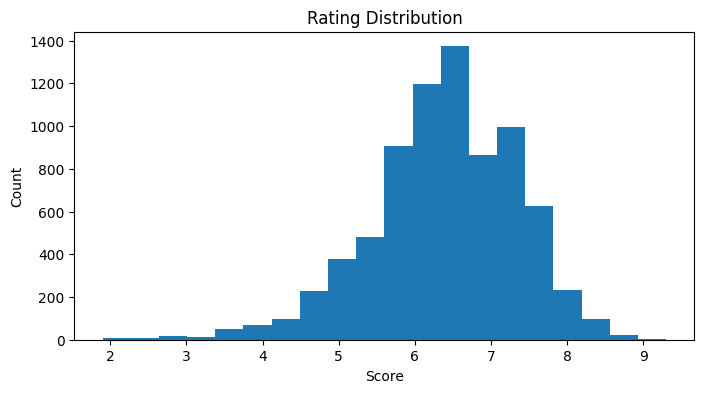

In [4]:
# ------------------ 1. Rating Distribution -------------------
plt.figure(figsize=(8,4))
plt.hist(df['score'], bins=20)
plt.title("Rating Distribution")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()


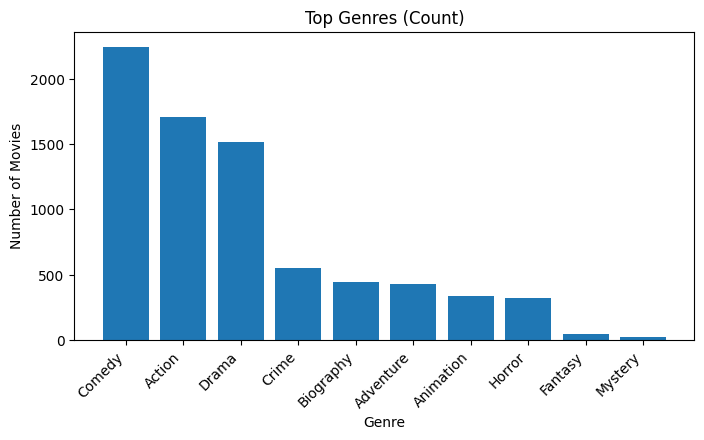

In [5]:
# ------------------ 2. Genre Count -------------------
genre_count = df['genre'].value_counts().head(10)

plt.figure(figsize=(8,4))
plt.bar(genre_count.index, genre_count.values)
plt.title("Top Genres (Count)")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45, ha='right')
plt.show()

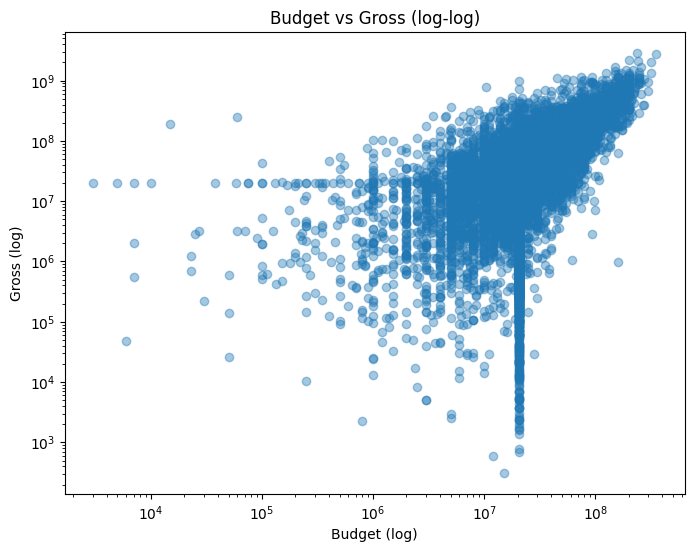

In [6]:
# ------------------ 3. Budget vs Gross -------------------
plt.figure(figsize=(8,6))
plt.scatter(df['budget'], df['gross'], alpha=0.4)
plt.xscale('log')
plt.yscale('log')
plt.title("Budget vs Gross (log-log)")
plt.xlabel("Budget (log)")
plt.ylabel("Gross (log)")
plt.show()

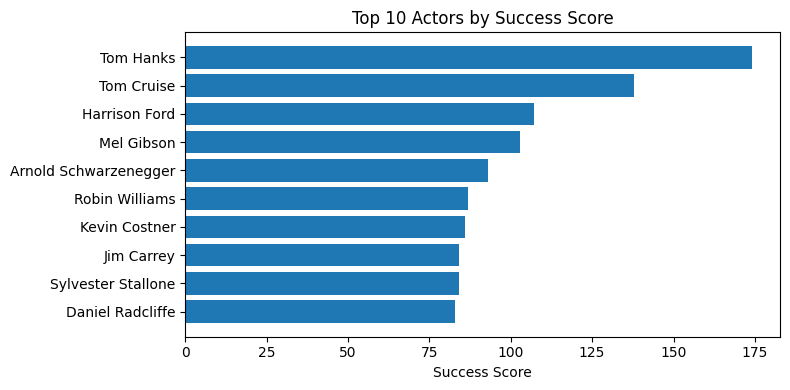

In [7]:
# ------------------ 4. Top Actors by Success Score -------------------
top_actors = (df[['star','actor_success_score']]
              .drop_duplicates(subset='star')
              .sort_values('actor_success_score', ascending=False)
              .head(10))

plt.figure(figsize=(8,4))
plt.barh(top_actors['star'][::-1], top_actors['actor_success_score'][::-1])
plt.title("Top 10 Actors by Success Score")
plt.xlabel("Success Score")
plt.tight_layout()
plt.show()


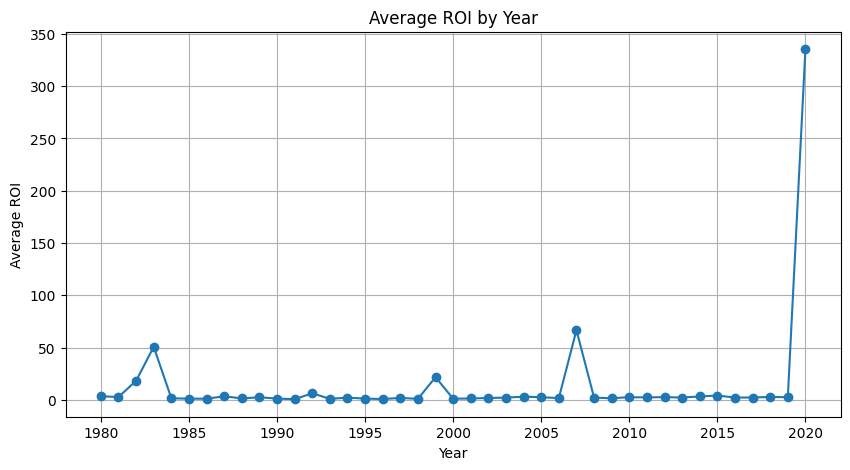

In [8]:
# ------------------- 5. Year vs Average ROI (Line Graph) ---------------

df['roi'] = (df['gross'] - df['budget']) / df['budget']

year_roi = df.groupby('year')['roi'].mean()

plt.figure(figsize=(10,5))
plt.plot(year_roi.index, year_roi.values, marker='o')
plt.title("Average ROI by Year")
plt.xlabel("Year")
plt.ylabel("Average ROI")
plt.grid(True)
plt.show()


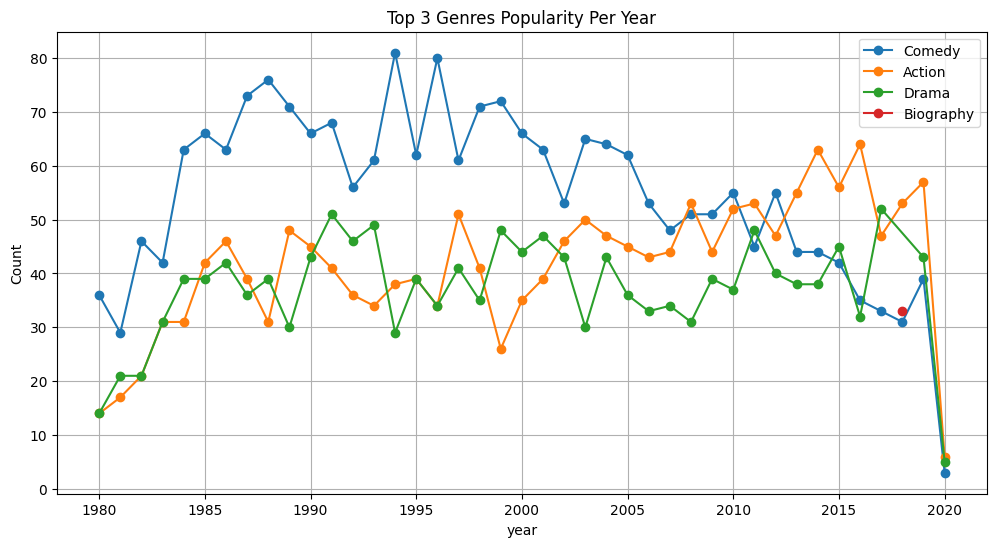

In [9]:
genre_year_count = (
    df.groupby(['year', 'genre'])
      .size()
      .reset_index(name='Count')
)

top3_genre_per_year = (
    genre_year_count
    .sort_values(['year', 'Count'], ascending=[True, False])
    .groupby('year')
    .head(3)
)

plt.figure(figsize=(12, 6))

for genre in top3_genre_per_year['genre'].unique():
    data = top3_genre_per_year[top3_genre_per_year['genre'] == genre]
    plt.plot(data['year'], data['Count'], marker='o', label=genre)

plt.xlabel('year')
plt.ylabel('Count')
plt.title('Top 3 Genres Popularity Per Year')
plt.legend()
plt.grid(True)
plt.show()
